In [54]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors as KNN
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import r2_score as AS
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression as lor
sna=pd.read_csv('Social_Network_Ads.csv')

In [2]:
sna

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
sna.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [4]:
le=LabelEncoder()

In [5]:
le.fit(sna['Gender'])

LabelEncoder()

In [6]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [7]:
encoded_values=le.transform(sna['Gender'])

In [8]:
sna['Gender']=encoded_values

In [9]:
sna

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [10]:
sna.dtypes

User ID            int64
Gender             int32
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [11]:
sna.select_dtypes(include=[np.number])

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [12]:
corr_matrix = sna.corr()

In [13]:
corr_matrix

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


<AxesSubplot:>

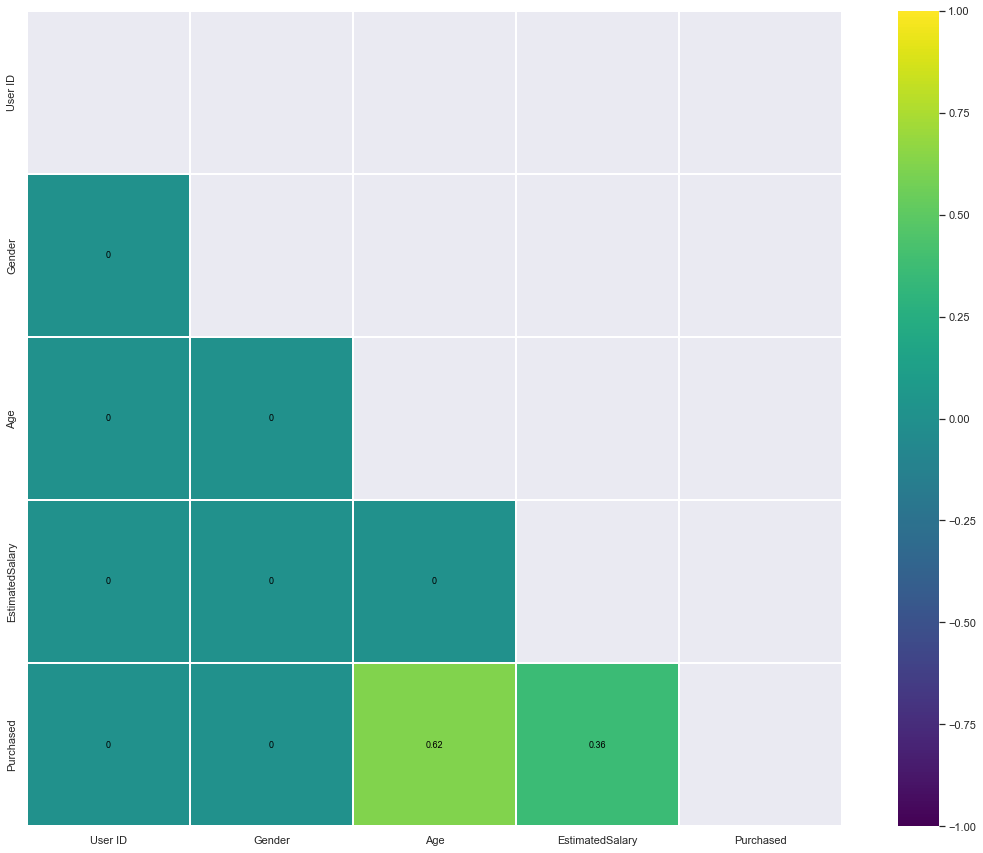

In [14]:
# Replace any correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [15]:
data_corr=sna.corr()['Purchased']
data_corr

User ID            0.007120
Gender            -0.042469
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64

In [16]:
high_features_list = data_corr[abs(data_corr) >= 0.1].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

3 strongly correlated values with SalePrice:
Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Name: Purchased, dtype: float64



In [17]:
sna

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [18]:
maxs=sna.where((sna['Age']==60))

In [19]:
age_max=maxs.dropna()

In [20]:
age_max

,User ID,Gender,Age,EstimatedSalary,Purchased
215,15779529.0,0.0,60.0,108000.0,1.0
223,15593715.0,1.0,60.0,102000.0,1.0
272,15791373.0,1.0,60.0,42000.0,1.0
355,15606472.0,1.0,60.0,34000.0,1.0
370,15611430.0,0.0,60.0,46000.0,1.0
371,15774744.0,1.0,60.0,83000.0,1.0
393,15635893.0,1.0,60.0,42000.0,1.0


In [21]:
max_sal=sna.where(sna['EstimatedSalary']==max(sna['EstimatedSalary']))

In [22]:
max_sal=max_sal.dropna()

In [23]:
max_sal

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829.0,0.0,32.0,150000.0,1.0
211,15735878.0,1.0,52.0,150000.0,1.0


In [24]:
data_corr= data_corr[abs(data_corr) <= 0.1].sort_values(ascending=False)
data_corr

User ID    0.007120
Gender    -0.042469
Name: Purchased, dtype: float64

In [25]:
data_corr

User ID    0.007120
Gender    -0.042469
Name: Purchased, dtype: float64

In [26]:
drop_cols=data_corr.index.tolist()

In [27]:
drop_cols

['User ID', 'Gender']

In [28]:
data_corr.index.tolist()

['User ID', 'Gender']

In [29]:
cols=sna.columns
cols=cols.tolist()
cols

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [30]:
if drop_cols[0] == cols[0]:
    print("in")

in


In [31]:
sna.drop(drop_cols,axis=1,inplace=True)

In [32]:
sna

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [33]:
sna['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [34]:
sna.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [35]:
x=sna['Age'].values

In [36]:
y=sna['Purchased'].values

In [37]:
#x=sna['EstimatedSalary'].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [39]:
print(X_train, X_test, y_train, y_test)

[44 32 38 32 52 53 39 38 36 36 35 35 42 47 59 49 45 31 46 47 26 60 38 40
 42 35 48 48 38 29 26 60 24 42 46 28 39 28 41 45 33 20 31 42 35 33 40 51
 46 35 38 36 37 38 60 20 57 42 26 46 35 21 28 41 37 27 39 28 31 25 35 37
 35 47 35 48 26 25 52 51 35 33 30 48 41 48 31 31 43 59 18 36 42 47 26 40
 46 59 46 35 28 40 59 57 52 47 53 35 58 45 23 46 42 28 38 26 29 37 22 48
 49 38 27 46 48 26 35 39 24 32 46 35 56 47 40 32 19 25 35 28 50 40 50 35
 40 46 39 20 29 31 47 40 34 38 42 47 39 19 37 36 41 36 48 36 51 27 38 39
 22 33 48 58 53 32 54 30 58 26 45 24 40 33 44 22 33 43 24 46 35 54 48 35
 37 23 37 31 33 45 30 19 49 39 35 39 24 41 29 54 35 37 29 31 42 30 52 50
 56 29 30 26 33 41 36 55 48 41 30 37 41 58 30 20 37 41 49 28 53 40 60 35
 21 38 39 37 26 35 54 30 39 29 33 35 41 41 39 27 21 26 31 39 41 47 41 37
 60 25 28 38 36 20 56 40 42 20 40 47 18 35 57 34 49 27 19 39 26 25 28 55
 50 49 52 35 42 34 37 48 29 36 27 26] [30 38 35 30 35 27 31 36 18 47 30 28 37 39 20 32 37 19 55 35 35 47 41 47
 23 49 28 29 

In [40]:
std = StandardScaler()
X_train = std.fit_transform(X_train.reshape(-1,1))
X_test = std.transform(X_test.reshape(-1,1))

In [41]:
print(X_train, X_test, y_train, y_test)

[[ 0.58164944]
 [-0.60673761]
 [-0.01254409]
 [-0.60673761]
 [ 1.37390747]
 [ 1.47293972]
 [ 0.08648817]
 [-0.01254409]
 [-0.21060859]
 [-0.21060859]
 [-0.30964085]
 [-0.30964085]
 [ 0.38358493]
 [ 0.8787462 ]
 [ 2.06713324]
 [ 1.07681071]
 [ 0.68068169]
 [-0.70576986]
 [ 0.77971394]
 [ 0.8787462 ]
 [-1.20093113]
 [ 2.1661655 ]
 [-0.01254409]
 [ 0.18552042]
 [ 0.38358493]
 [-0.30964085]
 [ 0.97777845]
 [ 0.97777845]
 [-0.01254409]
 [-0.90383437]
 [-1.20093113]
 [ 2.1661655 ]
 [-1.39899564]
 [ 0.38358493]
 [ 0.77971394]
 [-1.00286662]
 [ 0.08648817]
 [-1.00286662]
 [ 0.28455268]
 [ 0.68068169]
 [-0.50770535]
 [-1.79512465]
 [-0.70576986]
 [ 0.38358493]
 [-0.30964085]
 [-0.50770535]
 [ 0.18552042]
 [ 1.27487521]
 [ 0.77971394]
 [-0.30964085]
 [-0.01254409]
 [-0.21060859]
 [-0.11157634]
 [-0.01254409]
 [ 2.1661655 ]
 [-1.79512465]
 [ 1.86906873]
 [ 0.38358493]
 [-1.20093113]
 [ 0.77971394]
 [-0.30964085]
 [-1.6960924 ]
 [-1.00286662]
 [ 0.28455268]
 [-0.11157634]
 [-1.10189888]
 [ 0.08648

In [44]:
model1 = lor()
model1.fit(X_train, y_train)
score1 = AS(y_test, model1.predict(X_test))

In [45]:
score1

0.5404411764705881

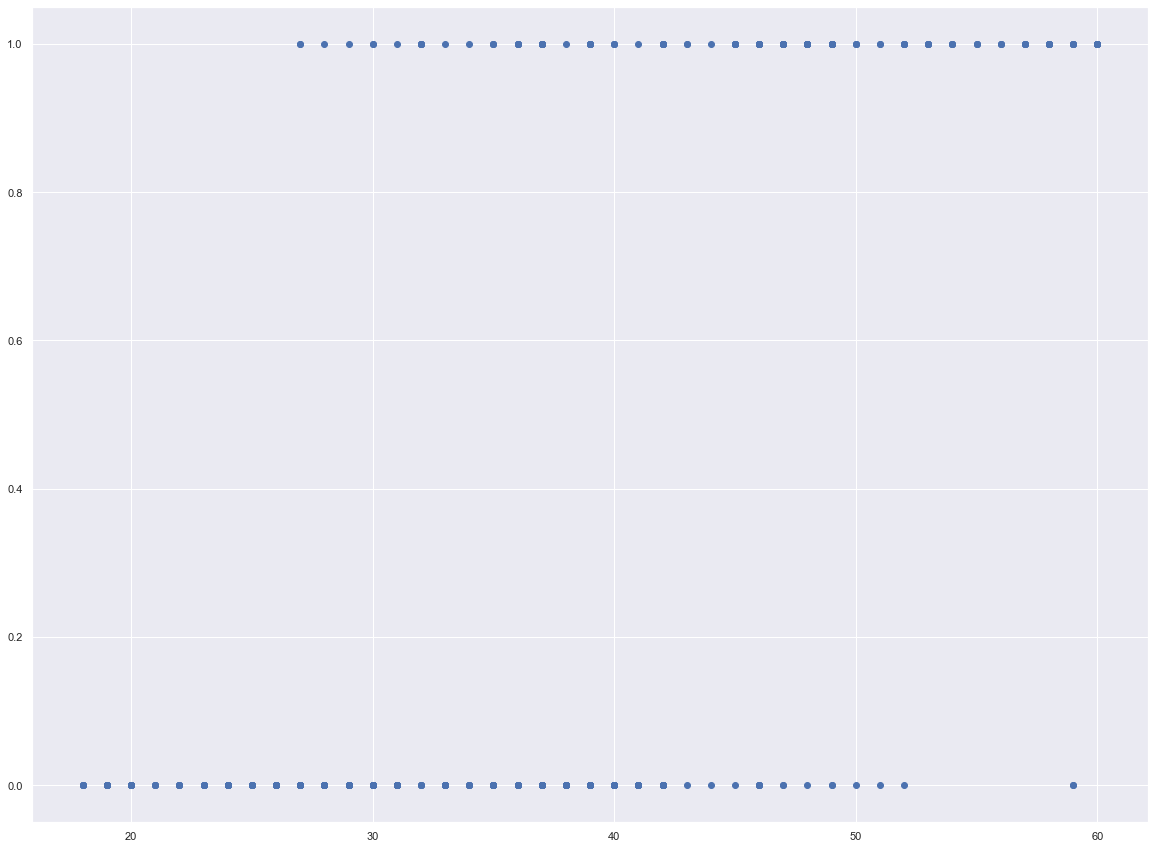

In [46]:
plt.scatter(x,y)

In [47]:
dtc=DTC()
dtc.fit(x.reshape(-1,1),y.reshape(-1,1))

DecisionTreeClassifier()

In [48]:
pred=dtc.predict(x.reshape(-1,1))
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [49]:
AS(y,pred)

0.31430437267013145

In [50]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(x.reshape(-1,1), y.reshape(-1,1))

C:\Users\numam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [51]:
pred=classifier.predict(x.reshape(-1,1))

In [53]:
AS(y,pred)*100
# not linearly saperable.

30.34203150934668

In [58]:
rfc=RFC()
rfc.fit(x.reshape(-1,1),y.reshape(-1,1))
pred=rfc.predict(x.reshape(-1,1))

C:\Users\numam\AppData\Local\Temp/ipykernel_10904/3116287393.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x.reshape(-1,1),y.reshape(-1,1))


In [60]:
AS(y,pred)

0.31430437267013145

In [61]:
#desicion tree classifier and random forest classifier has similar accuracy !